In [1]:
import tensorflow as tf  
import os  
import numpy as np  
import re  
from PIL import Image  
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class NodeLookup(object):  
    def __init__(self):  
        label_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'  
        uid_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt'  
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)  
  
    def load(self, label_lookup_path, uid_lookup_path):  
        #加载分类字符串n ------ 对应分类名称的文件  
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()  
        uid_to_human = {}  
        #一行一行读取数据  
        for line in proto_as_ascii_lines :  
            #去掉换行符  
            line = line.strip('\n')  
            #按照‘\t’分割  
            parsed_items = line.split('\t')  
            #获取分类编号和分类名称  
            uid = parsed_items[0]  
            human_string = parsed_items[1]  
            #保存编号字符串-----与分类名称映射关系  
            uid_to_human[uid] = human_string  
  
  
        #加载分类字符串n ----- 对应分类编号1-1000的文件  
        proto_as_ascii_lines = tf.gfile.GFile(label_lookup_path).readlines()  
        node_id_to_uid = {}  
        for line in proto_as_ascii_lines :  
            if line.startswith('  target_class:'):  
                #获取分类编号1-1000  
                target_class = int(line.split(': ')[1])  
            if line.startswith('  target_class_string:'):  
                #获取编号字符串n****  
                target_class_string = line.split(': ')[1]  
                #保存分类编号1-1000与编号字符串n****的映射关系  
                node_id_to_uid[target_class] = target_class_string[1:-2]  
  
  
        #建立分类编号1-1000对应分类名称的映射关系  
        node_id_to_name = {}  
        for key, val in node_id_to_uid.items():  
            #获取分类名称  
            name = uid_to_human[val]  
            #建立分类编号1-1000到分类名称的映射关系  
            node_id_to_name[key] = name  
        return node_id_to_name  
  
    #传入分类编号1-1000返回分类名称  
    def id_to_string(self, node_id):  
        if node_id not in self.node_lookup:  
            return ''  
        return self.node_lookup[node_id]  

# 创建一个图来存放google训练好的模型  #2 load graph  
with tf.gfile.FastGFile('inception_model/classify_image_graph_def.pb', 'rb') as f:  
    graph_def = tf.GraphDef()  
    graph_def.ParseFromString(f.read())  
    tf.import_graph_def(graph_def, name='')  
  

test_images/32*32cifar/orange_padding/89.jpg


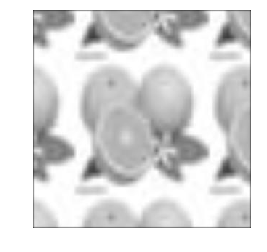

cassette player (score = 0.18777)
gong, tam-tam (score = 0.15822)
plate rack (score = 0.11545)
electric fan, blower (score = 0.04664)
fire screen, fireguard (score = 0.03317)

test_images/32*32cifar/orange_padding/93.jpg


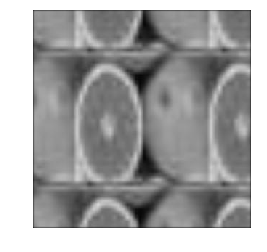

barrel, cask (score = 0.84677)
rain barrel (score = 0.03486)
plate rack (score = 0.02989)
gong, tam-tam (score = 0.00172)
cassette player (score = 0.00153)

test_images/32*32cifar/orange_padding/81.jpg


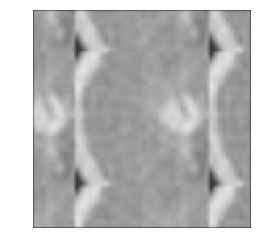

nematode, nematode worm, roundworm (score = 0.14046)
bulletproof vest (score = 0.11730)
prison, prison house (score = 0.04354)
guillotine (score = 0.02911)
worm fence, snake fence, snake-rail fence, Virginia fence (score = 0.01988)

test_images/32*32cifar/orange_padding/82.jpg


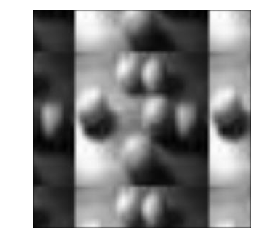

abacus (score = 0.82978)
gong, tam-tam (score = 0.00576)
breastplate, aegis, egis (score = 0.00379)
Granny Smith (score = 0.00310)
Shih-Tzu (score = 0.00284)

test_images/32*32cifar/orange_padding/30.jpg


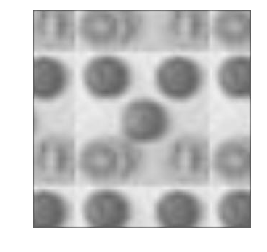

hand-held computer, hand-held microcomputer (score = 0.11160)
space bar (score = 0.08243)
oscilloscope, scope, cathode-ray oscilloscope, CRO (score = 0.06400)
thimble (score = 0.05928)
pill bottle (score = 0.04944)

test_images/32*32cifar/orange_padding/37.jpg


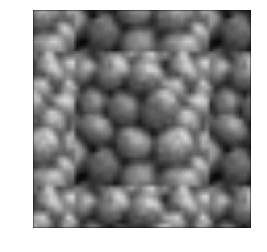

corn (score = 0.18849)
ear, spike, capitulum (score = 0.16840)
grocery store, grocery, food market, market (score = 0.06206)
spaghetti squash (score = 0.02815)
cauliflower (score = 0.01948)

test_images/32*32cifar/orange_padding/41.jpg


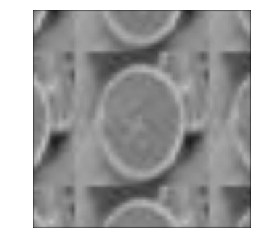

cassette player (score = 0.26041)
tape player (score = 0.11885)
cassette (score = 0.09362)
nematode, nematode worm, roundworm (score = 0.07881)
steam locomotive (score = 0.03425)

test_images/32*32cifar/orange_padding/98.jpg


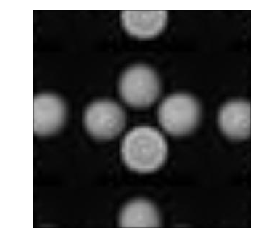

digital clock (score = 0.12964)
golf ball (score = 0.10991)
ping-pong ball (score = 0.10690)
analog clock (score = 0.05464)
spotlight, spot (score = 0.02526)

test_images/32*32cifar/orange_padding/87.jpg


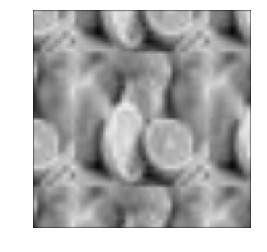

ping-pong ball (score = 0.19051)
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa (score = 0.06845)
revolver, six-gun, six-shooter (score = 0.01751)
rotisserie (score = 0.01743)
golf ball (score = 0.01492)

test_images/32*32cifar/orange_padding/65.jpg


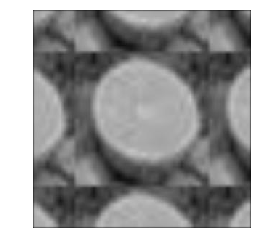

bulletproof vest (score = 0.07331)
fire screen, fireguard (score = 0.04109)
gong, tam-tam (score = 0.03869)
milk can (score = 0.02830)
potter's wheel (score = 0.02052)

test_images/32*32cifar/orange_padding/60.jpg


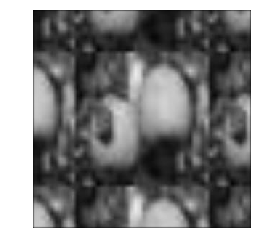

toyshop (score = 0.20635)
bulletproof vest (score = 0.04419)
parallel bars, bars (score = 0.04133)
tobacco shop, tobacconist shop, tobacconist (score = 0.04036)
thresher, thrasher, threshing machine (score = 0.02722)

test_images/32*32cifar/orange_padding/53.jpg


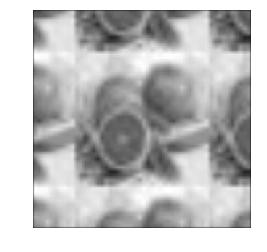

bulletproof vest (score = 0.31087)
gong, tam-tam (score = 0.18698)
cassette player (score = 0.14055)
revolver, six-gun, six-shooter (score = 0.05240)
hamper (score = 0.02805)

test_images/32*32cifar/orange_padding/42.jpg


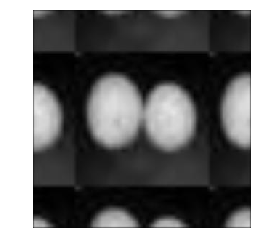

ping-pong ball (score = 0.15565)
abacus (score = 0.05352)
golf ball (score = 0.05194)
digital clock (score = 0.04409)
analog clock (score = 0.03524)

test_images/32*32cifar/orange_padding/56.jpg


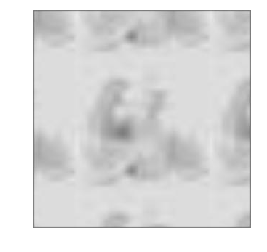

screen, CRT screen (score = 0.26160)
geyser (score = 0.25432)
television, television system (score = 0.02835)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.01777)
milk can (score = 0.01648)

test_images/32*32cifar/orange_padding/62.jpg


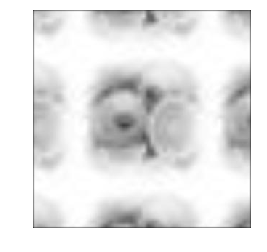

Dandie Dinmont, Dandie Dinmont terrier (score = 0.15424)
clumber, clumber spaniel (score = 0.10775)
Pekinese, Pekingese, Peke (score = 0.06504)
Japanese spaniel (score = 0.05864)
Sussex spaniel (score = 0.04470)

test_images/32*32cifar/orange_padding/85.jpg


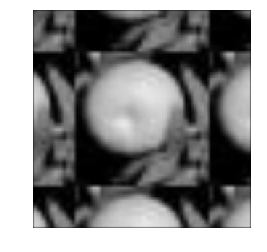

gong, tam-tam (score = 0.78681)
thresher, thrasher, threshing machine (score = 0.02184)
chime, bell, gong (score = 0.01839)
projectile, missile (score = 0.01731)
bulletproof vest (score = 0.01209)

test_images/32*32cifar/orange_padding/2.jpg


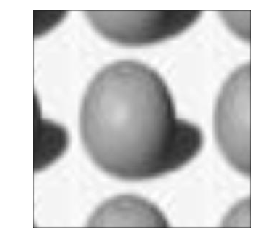

ping-pong ball (score = 0.51168)
croquet ball (score = 0.23226)
abacus (score = 0.04124)
punching bag, punch bag, punching ball, punchball (score = 0.01984)
face powder (score = 0.01540)

test_images/32*32cifar/orange_padding/46.jpg


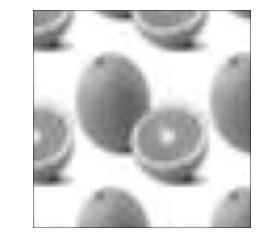

face powder (score = 0.11959)
cassette player (score = 0.11389)
typewriter keyboard (score = 0.07418)
espresso maker (score = 0.06051)
gong, tam-tam (score = 0.05996)

test_images/32*32cifar/orange_padding/49.jpg


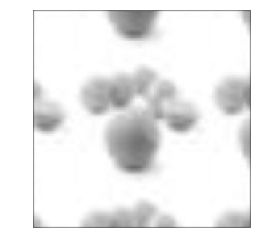

screen, CRT screen (score = 0.05136)
shoji (score = 0.04799)
television, television system (score = 0.03002)
guillotine (score = 0.02427)
analog clock (score = 0.02128)

test_images/32*32cifar/orange_padding/24.jpg


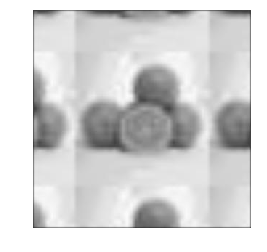

plate rack (score = 0.29737)
abacus (score = 0.05667)
medicine chest, medicine cabinet (score = 0.05049)
thimble (score = 0.01965)
ping-pong ball (score = 0.01593)

test_images/32*32cifar/orange_padding/9.jpg


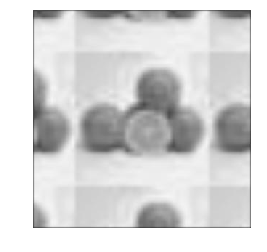

dumbbell (score = 0.43358)
plate rack (score = 0.09970)
barbell (score = 0.05509)
hair slide (score = 0.02413)
abacus (score = 0.01652)

test_images/32*32cifar/orange_padding/20.jpg


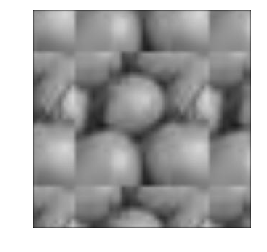

ping-pong ball (score = 0.25904)
spaghetti squash (score = 0.05100)
grocery store, grocery, food market, market (score = 0.03130)
lemon (score = 0.01001)
croquet ball (score = 0.00970)

test_images/32*32cifar/orange_padding/61.jpg


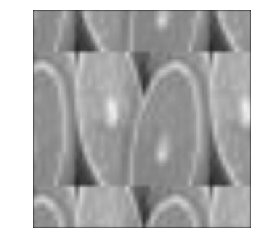

plate rack (score = 0.86848)
toilet seat (score = 0.01110)
dishwasher, dish washer, dishwashing machine (score = 0.00846)
fire screen, fireguard (score = 0.00548)
barrel, cask (score = 0.00402)

test_images/32*32cifar/orange_padding/73.jpg


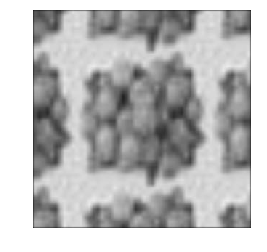

bulletproof vest (score = 0.50914)
jigsaw puzzle (score = 0.12252)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.03382)
assault rifle, assault gun (score = 0.03040)
toyshop (score = 0.02339)

test_images/32*32cifar/orange_padding/1.jpg


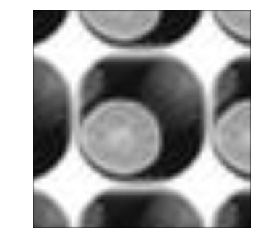

Petri dish (score = 0.05642)
abacus (score = 0.05446)
face powder (score = 0.05255)
ping-pong ball (score = 0.02871)
barrel, cask (score = 0.02608)

test_images/32*32cifar/orange_padding/48.jpg


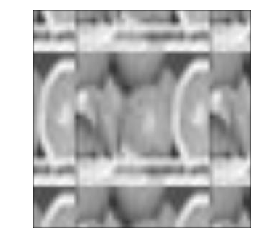

plate rack (score = 0.58074)
toilet seat (score = 0.04416)
dishwasher, dish washer, dishwashing machine (score = 0.03663)
barrel, cask (score = 0.02004)
thresher, thrasher, threshing machine (score = 0.01864)

test_images/32*32cifar/orange_padding/12.jpg


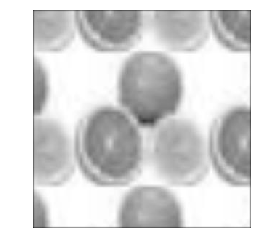

ping-pong ball (score = 0.35317)
gong, tam-tam (score = 0.14489)
face powder (score = 0.06005)
cassette player (score = 0.03314)
frying pan, frypan, skillet (score = 0.02067)

test_images/32*32cifar/orange_padding/84.jpg


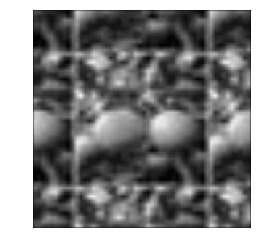

parallel bars, bars (score = 0.32721)
horizontal bar, high bar (score = 0.24388)
balance beam, beam (score = 0.03388)
worm fence, snake fence, snake-rail fence, Virginia fence (score = 0.03150)
airship, dirigible (score = 0.02033)

test_images/32*32cifar/orange_padding/34.jpg


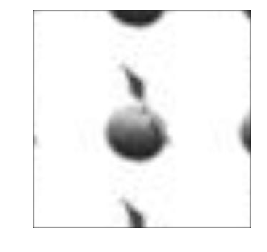

punching bag, punch bag, punching ball, punchball (score = 0.35585)
volleyball (score = 0.07818)
guillotine (score = 0.05366)
chime, bell, gong (score = 0.03539)
gong, tam-tam (score = 0.03089)

test_images/32*32cifar/orange_padding/22.jpg


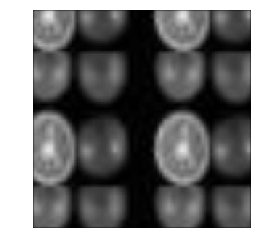

typewriter keyboard (score = 0.47065)
space bar (score = 0.18711)
abacus (score = 0.01253)
plunger, plumber's helper (score = 0.01200)
hand-held computer, hand-held microcomputer (score = 0.00815)

test_images/32*32cifar/orange_padding/75.jpg


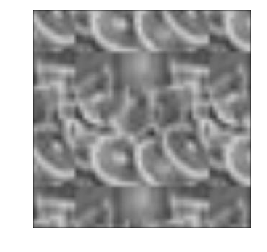

tobacco shop, tobacconist shop, tobacconist (score = 0.29351)
chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour (score = 0.08304)
book jacket, dust cover, dust jacket, dust wrapper (score = 0.05945)
fire screen, fireguard (score = 0.04278)
nematode, nematode worm, roundworm (score = 0.01908)

test_images/32*32cifar/orange_padding/31.jpg


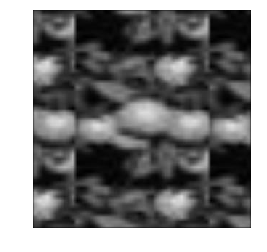

parallel bars, bars (score = 0.62383)
horizontal bar, high bar (score = 0.30089)
balance beam, beam (score = 0.01341)
rotisserie (score = 0.00722)
pickelhaube (score = 0.00563)

test_images/32*32cifar/orange_padding/54.jpg


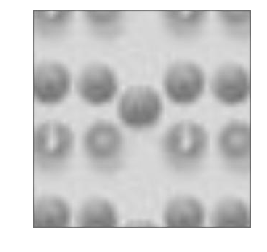

golf ball (score = 0.28887)
shower curtain (score = 0.04789)
solar dish, solar collector, solar furnace (score = 0.03867)
digital clock (score = 0.02866)
ping-pong ball (score = 0.02194)

test_images/32*32cifar/orange_padding/64.jpg


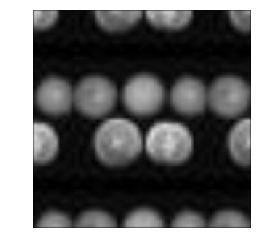

space bar (score = 0.76501)
typewriter keyboard (score = 0.21195)
hand-held computer, hand-held microcomputer (score = 0.00380)
remote control, remote (score = 0.00199)
abacus (score = 0.00088)

test_images/32*32cifar/orange_padding/5.jpg


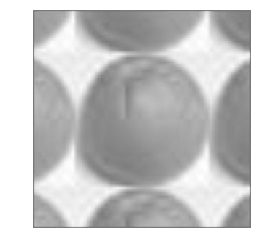

ping-pong ball (score = 0.88447)
Petri dish (score = 0.03204)
face powder (score = 0.03024)
viaduct (score = 0.00588)
traffic light, traffic signal, stoplight (score = 0.00551)

test_images/32*32cifar/orange_padding/67.jpg


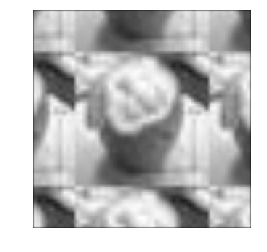

potter's wheel (score = 0.12501)
assault rifle, assault gun (score = 0.06718)
hourglass (score = 0.05206)
espresso maker (score = 0.04929)
toyshop (score = 0.03487)

test_images/32*32cifar/orange_padding/68.jpg


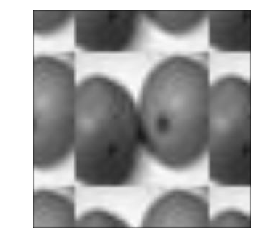

gong, tam-tam (score = 0.11833)
ping-pong ball (score = 0.10821)
chime, bell, gong (score = 0.04136)
abacus (score = 0.03984)
croquet ball (score = 0.02855)

test_images/32*32cifar/orange_padding/58.jpg


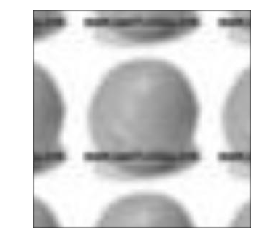

plate rack (score = 0.31499)
espresso maker (score = 0.06906)
dishwasher, dish washer, dishwashing machine (score = 0.06188)
frying pan, frypan, skillet (score = 0.04685)
cassette player (score = 0.03135)

test_images/32*32cifar/orange_padding/14.jpg


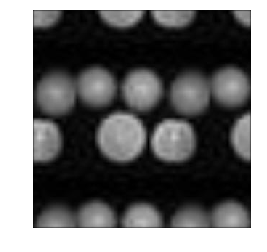

space bar (score = 0.72852)
typewriter keyboard (score = 0.19562)
hand-held computer, hand-held microcomputer (score = 0.02122)
remote control, remote (score = 0.00419)
golf ball (score = 0.00144)

test_images/32*32cifar/orange_padding/39.jpg


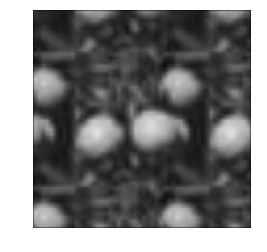

ping-pong ball (score = 0.94588)
parallel bars, bars (score = 0.01127)
golf ball (score = 0.00578)
horizontal bar, high bar (score = 0.00568)
toyshop (score = 0.00196)

test_images/32*32cifar/orange_padding/26.jpg


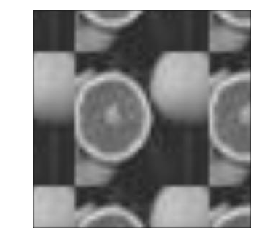

typewriter keyboard (score = 0.65230)
space bar (score = 0.11154)
espresso maker (score = 0.01685)
Petri dish (score = 0.00733)
cassette player (score = 0.00604)

test_images/32*32cifar/orange_padding/70.jpg


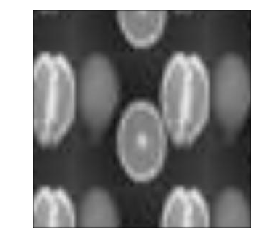

typewriter keyboard (score = 0.39984)
space bar (score = 0.06242)
barometer (score = 0.03463)
oboe, hautboy, hautbois (score = 0.02018)
lampshade, lamp shade (score = 0.01640)

test_images/32*32cifar/orange_padding/4.jpg


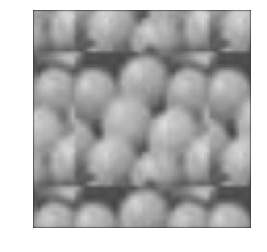

ping-pong ball (score = 0.97981)
golf ball (score = 0.00471)
abacus (score = 0.00178)
tennis ball (score = 0.00123)
confectionery, confectionary, candy store (score = 0.00054)

test_images/32*32cifar/orange_padding/6.jpg


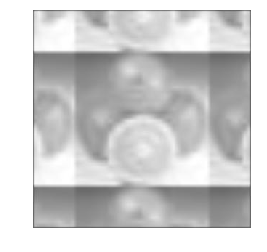

electric fan, blower (score = 0.41858)
nipple (score = 0.13319)
safe (score = 0.07305)
combination lock (score = 0.04252)
dishwasher, dish washer, dishwashing machine (score = 0.03063)

test_images/32*32cifar/orange_padding/38.jpg


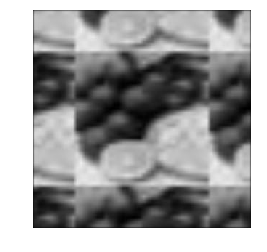

rotisserie (score = 0.70679)
horizontal bar, high bar (score = 0.06010)
tobacco shop, tobacconist shop, tobacconist (score = 0.06010)
parallel bars, bars (score = 0.03661)
toyshop (score = 0.01431)

test_images/32*32cifar/orange_padding/79.jpg


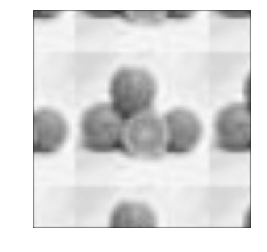

dumbbell (score = 0.46569)
punching bag, punch bag, punching ball, punchball (score = 0.17590)
abacus (score = 0.03949)
barbell (score = 0.03456)
parallel bars, bars (score = 0.02368)

test_images/32*32cifar/orange_padding/57.jpg


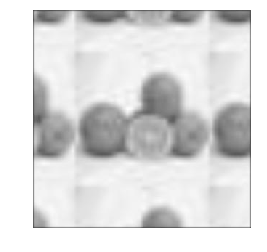

plate rack (score = 0.73386)
ping-pong ball (score = 0.05726)
pill bottle (score = 0.00968)
dishwasher, dish washer, dishwashing machine (score = 0.00910)
dumbbell (score = 0.00715)

test_images/32*32cifar/orange_padding/25.jpg


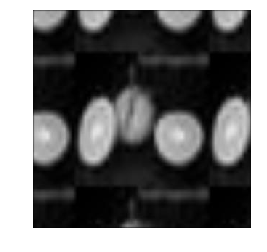

typewriter keyboard (score = 0.40983)
space bar (score = 0.40788)
abacus (score = 0.00638)
oscilloscope, scope, cathode-ray oscilloscope, CRO (score = 0.00560)
cassette player (score = 0.00476)

test_images/32*32cifar/orange_padding/90.jpg


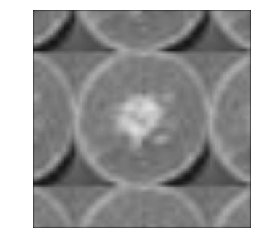

nematode, nematode worm, roundworm (score = 0.11265)
Petri dish (score = 0.08001)
fire screen, fireguard (score = 0.07709)
velvet (score = 0.03025)
prayer rug, prayer mat (score = 0.02696)

test_images/32*32cifar/orange_padding/16.jpg


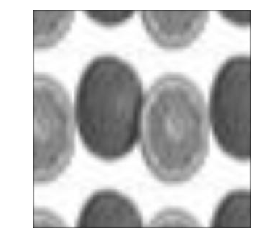

plate rack (score = 0.66217)
croquet ball (score = 0.02932)
abacus (score = 0.01587)
dumbbell (score = 0.01580)
barrel, cask (score = 0.01558)

test_images/32*32cifar/orange_padding/72.jpg


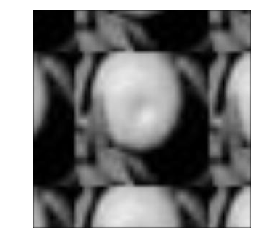

knee pad (score = 0.48324)
bulletproof vest (score = 0.24051)
volleyball (score = 0.02020)
bobsled, bobsleigh, bob (score = 0.01318)
balance beam, beam (score = 0.01002)

test_images/32*32cifar/orange_padding/76.jpg


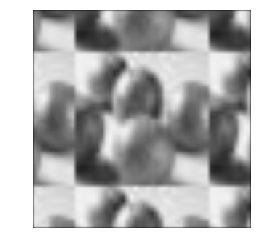

abacus (score = 0.84159)
rotisserie (score = 0.03776)
dumbbell (score = 0.00997)
plate rack (score = 0.00749)
tobacco shop, tobacconist shop, tobacconist (score = 0.00566)

test_images/32*32cifar/orange_padding/69.jpg


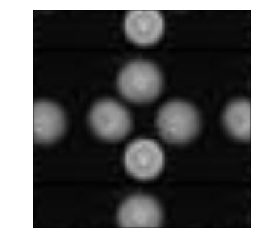

digital clock (score = 0.10091)
ping-pong ball (score = 0.07550)
scoreboard (score = 0.05195)
pool table, billiard table, snooker table (score = 0.05163)
golf ball (score = 0.04424)

test_images/32*32cifar/orange_padding/55.jpg


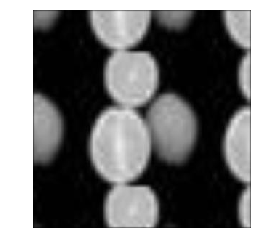

ping-pong ball (score = 0.28865)
space bar (score = 0.12286)
typewriter keyboard (score = 0.12154)
hair slide (score = 0.02803)
Petri dish (score = 0.02484)

test_images/32*32cifar/orange_padding/10.jpg


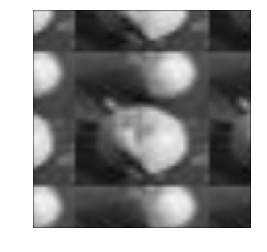

bulletproof vest (score = 0.18637)
ping-pong ball (score = 0.14408)
gong, tam-tam (score = 0.04316)
fire screen, fireguard (score = 0.03153)
projectile, missile (score = 0.02180)

test_images/32*32cifar/orange_padding/95.jpg


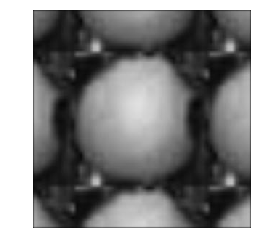

ping-pong ball (score = 0.17775)
gong, tam-tam (score = 0.09475)
drum, membranophone, tympan (score = 0.08264)
potter's wheel (score = 0.05021)
space shuttle (score = 0.02348)

test_images/32*32cifar/orange_padding/15.jpg


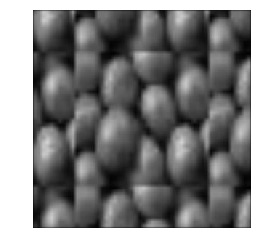

spaghetti squash (score = 0.14346)
grocery store, grocery, food market, market (score = 0.11744)
zucchini, courgette (score = 0.11551)
cucumber, cuke (score = 0.05430)
Granny Smith (score = 0.02976)

test_images/32*32cifar/orange_padding/52.jpg


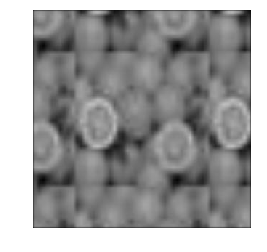

typewriter keyboard (score = 0.58250)
space bar (score = 0.15669)
hamper (score = 0.01294)
barometer (score = 0.00905)
abacus (score = 0.00580)

test_images/32*32cifar/orange_padding/27.jpg


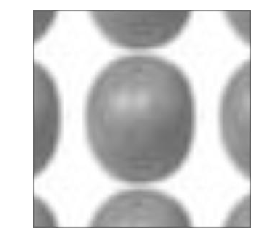

croquet ball (score = 0.78726)
ping-pong ball (score = 0.05112)
dumbbell (score = 0.01594)
gong, tam-tam (score = 0.01403)
abacus (score = 0.01339)

test_images/32*32cifar/orange_padding/100.jpg


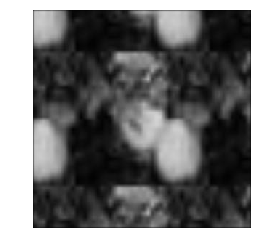

parallel bars, bars (score = 0.53099)
horizontal bar, high bar (score = 0.38251)
balance beam, beam (score = 0.04954)
bulletproof vest (score = 0.00879)
tobacco shop, tobacconist shop, tobacconist (score = 0.00262)

test_images/32*32cifar/orange_padding/63.jpg


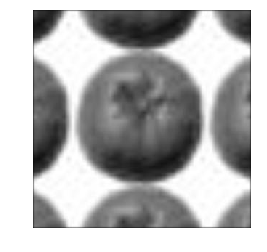

abacus (score = 0.63676)
croquet ball (score = 0.10255)
ping-pong ball (score = 0.09364)
gong, tam-tam (score = 0.01697)
spaghetti squash (score = 0.00860)

test_images/32*32cifar/orange_padding/21.jpg


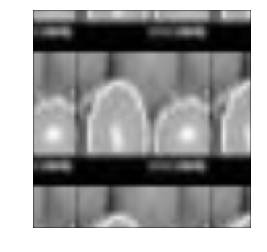

vending machine (score = 0.09213)
plate rack (score = 0.08978)
china cabinet, china closet (score = 0.04336)
tobacco shop, tobacconist shop, tobacconist (score = 0.03327)
ping-pong ball (score = 0.02784)

test_images/32*32cifar/orange_padding/66.jpg


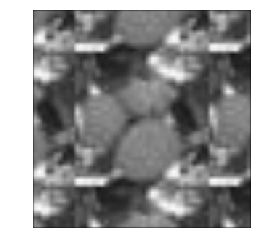

toyshop (score = 0.53656)
tobacco shop, tobacconist shop, tobacconist (score = 0.37224)
steel drum (score = 0.02360)
bulletproof vest (score = 0.00799)
parallel bars, bars (score = 0.00711)

test_images/32*32cifar/orange_padding/50.jpg


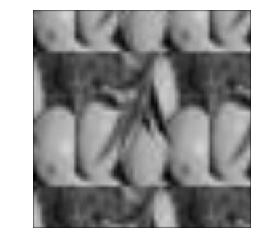

typewriter keyboard (score = 0.23445)
milk can (score = 0.13464)
ping-pong ball (score = 0.09861)
space bar (score = 0.09084)
cuirass (score = 0.05603)

test_images/32*32cifar/orange_padding/44.jpg


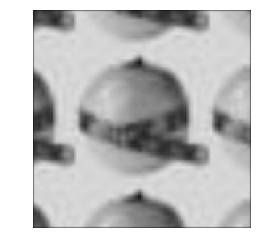

espresso maker (score = 0.78889)
pickelhaube (score = 0.03805)
can opener, tin opener (score = 0.02735)
plane, carpenter's plane, woodworking plane (score = 0.01112)
oxygen mask (score = 0.00825)

test_images/32*32cifar/orange_padding/45.jpg


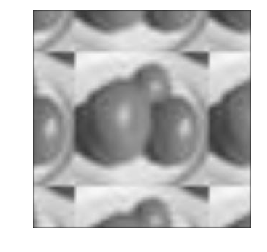

gong, tam-tam (score = 0.17841)
plate rack (score = 0.17052)
croquet ball (score = 0.12719)
ping-pong ball (score = 0.08175)
traffic light, traffic signal, stoplight (score = 0.04210)

test_images/32*32cifar/orange_padding/29.jpg


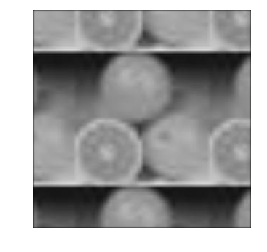

plate rack (score = 0.63333)
golf ball (score = 0.08759)
china cabinet, china closet (score = 0.08650)
dishwasher, dish washer, dishwashing machine (score = 0.01812)
ping-pong ball (score = 0.01188)

test_images/32*32cifar/orange_padding/97.jpg


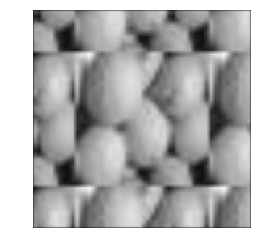

ping-pong ball (score = 0.99800)
golf ball (score = 0.00020)
face powder (score = 0.00014)
Bedlington terrier (score = 0.00011)
milk can (score = 0.00005)

test_images/32*32cifar/orange_padding/36.jpg


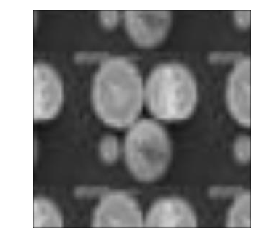

typewriter keyboard (score = 0.39329)
space bar (score = 0.32090)
nail (score = 0.06437)
analog clock (score = 0.01586)
hand-held computer, hand-held microcomputer (score = 0.00970)

test_images/32*32cifar/orange_padding/94.jpg


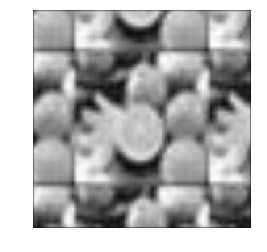

ping-pong ball (score = 0.95739)
grocery store, grocery, food market, market (score = 0.01091)
tobacco shop, tobacconist shop, tobacconist (score = 0.00439)
volleyball (score = 0.00354)
toyshop (score = 0.00214)

test_images/32*32cifar/orange_padding/40.jpg


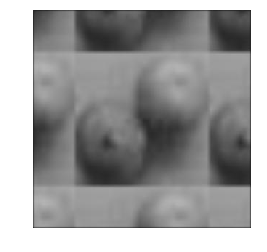

gong, tam-tam (score = 0.03565)
ocarina, sweet potato (score = 0.02144)
butternut squash (score = 0.01971)
nipple (score = 0.01938)
Granny Smith (score = 0.01856)

test_images/32*32cifar/orange_padding/18.jpg


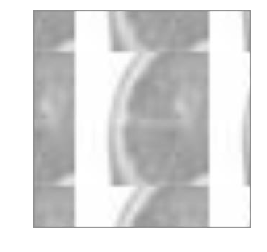

gong, tam-tam (score = 0.12649)
hourglass (score = 0.04200)
slide rule, slipstick (score = 0.03146)
chime, bell, gong (score = 0.03111)
cassette (score = 0.02939)

test_images/32*32cifar/orange_padding/86.jpg


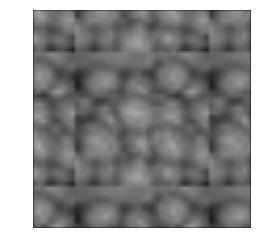

slide rule, slipstick (score = 0.27618)
horizontal bar, high bar (score = 0.07576)
rule, ruler (score = 0.04095)
bulletproof vest (score = 0.03909)
parallel bars, bars (score = 0.03290)

test_images/32*32cifar/orange_padding/71.jpg


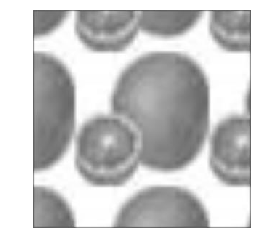

croquet ball (score = 0.48086)
abacus (score = 0.11988)
gong, tam-tam (score = 0.04488)
chime, bell, gong (score = 0.03915)
ping-pong ball (score = 0.03119)

test_images/32*32cifar/orange_padding/11.jpg


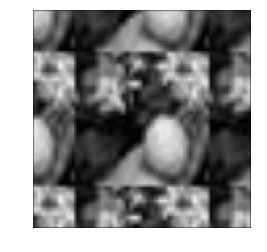

toyshop (score = 0.36098)
tobacco shop, tobacconist shop, tobacconist (score = 0.05793)
bulletproof vest (score = 0.03708)
gong, tam-tam (score = 0.02922)
airship, dirigible (score = 0.02723)

test_images/32*32cifar/orange_padding/92.jpg


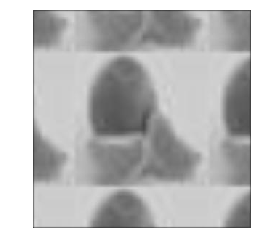

hourglass (score = 0.45771)
espresso maker (score = 0.09678)
television, television system (score = 0.05336)
screen, CRT screen (score = 0.03781)
beaker (score = 0.01581)

test_images/32*32cifar/orange_padding/3.jpg


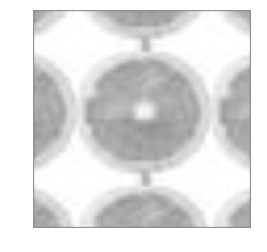

gong, tam-tam (score = 0.64397)
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system (score = 0.04987)
steel drum (score = 0.03740)
cassette player (score = 0.03219)
chime, bell, gong (score = 0.02002)

test_images/32*32cifar/orange_padding/17.jpg


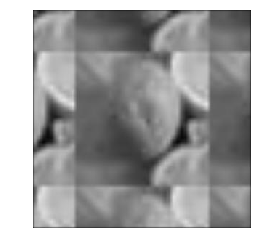

hourglass (score = 0.07991)
throne (score = 0.06362)
milk can (score = 0.04969)
spaghetti squash (score = 0.04891)
studio couch, day bed (score = 0.03192)

test_images/32*32cifar/orange_padding/83.jpg


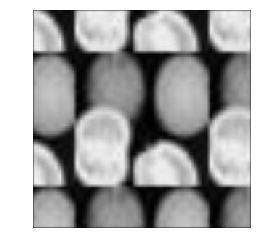

typewriter keyboard (score = 0.57488)
space bar (score = 0.14760)
panpipe, pandean pipe, syrinx (score = 0.01111)
abacus (score = 0.00723)
horizontal bar, high bar (score = 0.00417)

test_images/32*32cifar/orange_padding/35.jpg


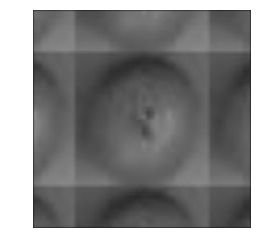

gong, tam-tam (score = 0.35719)
magnetic compass (score = 0.02021)
analog clock (score = 0.01557)
wall clock (score = 0.01412)
barometer (score = 0.01358)

test_images/32*32cifar/orange_padding/19.jpg


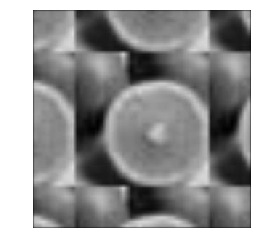

gong, tam-tam (score = 0.29981)
typewriter keyboard (score = 0.10649)
chime, bell, gong (score = 0.05802)
nematode, nematode worm, roundworm (score = 0.03237)
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system (score = 0.02251)

test_images/32*32cifar/orange_padding/78.jpg


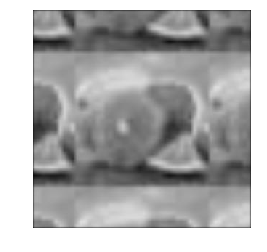

dugong, Dugong dugon (score = 0.38621)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus (score = 0.35715)
toyshop (score = 0.04259)
fox squirrel, eastern fox squirrel, Sciurus niger (score = 0.01128)
fire screen, fireguard (score = 0.00591)

test_images/32*32cifar/orange_padding/96.jpg


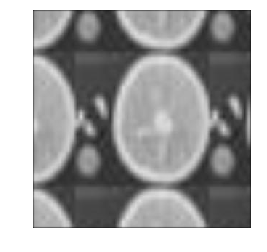

tape player (score = 0.23193)
cassette player (score = 0.22151)
fire screen, fireguard (score = 0.17958)
cassette (score = 0.02487)
plate rack (score = 0.01864)

test_images/32*32cifar/orange_padding/74.jpg


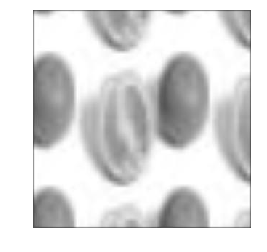

plate rack (score = 0.22748)
gong, tam-tam (score = 0.10666)
croquet ball (score = 0.04894)
cassette player (score = 0.03583)
frying pan, frypan, skillet (score = 0.03360)

test_images/32*32cifar/orange_padding/77.jpg


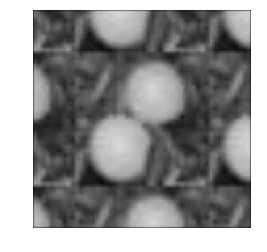

ping-pong ball (score = 0.92999)
analog clock (score = 0.00290)
golf ball (score = 0.00233)
earthstar (score = 0.00228)
baseball (score = 0.00209)

test_images/32*32cifar/orange_padding/47.jpg


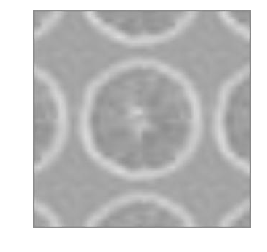

nematode, nematode worm, roundworm (score = 0.19368)
fire screen, fireguard (score = 0.13323)
analog clock (score = 0.01744)
wall clock (score = 0.01550)
jellyfish (score = 0.01525)

test_images/32*32cifar/orange_padding/91.jpg


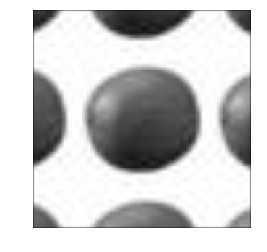

croquet ball (score = 0.41142)
dumbbell (score = 0.16658)
abacus (score = 0.11619)
punching bag, punch bag, punching ball, punchball (score = 0.04414)
ping-pong ball (score = 0.03460)

test_images/32*32cifar/orange_padding/99.jpg


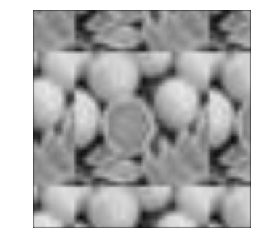

ping-pong ball (score = 0.99966)
golf ball (score = 0.00012)
viaduct (score = 0.00002)
grocery store, grocery, food market, market (score = 0.00001)
confectionery, confectionary, candy store (score = 0.00001)

test_images/32*32cifar/orange_padding/33.jpg


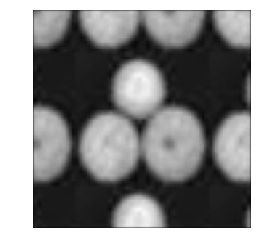

ping-pong ball (score = 0.58923)
golf ball (score = 0.30049)
fire screen, fireguard (score = 0.00477)
typewriter keyboard (score = 0.00468)
lampshade, lamp shade (score = 0.00399)

test_images/32*32cifar/orange_padding/51.jpg


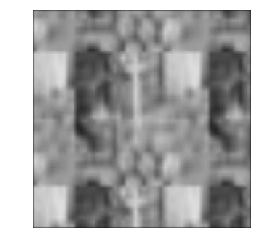

tobacco shop, tobacconist shop, tobacconist (score = 0.77282)
toyshop (score = 0.08029)
shoe shop, shoe-shop, shoe store (score = 0.02572)
parallel bars, bars (score = 0.01446)
guillotine (score = 0.00402)

test_images/32*32cifar/orange_padding/28.jpg


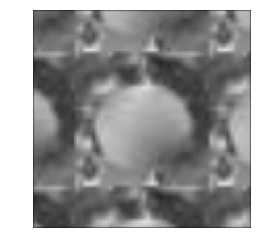

gong, tam-tam (score = 0.26452)
planetarium (score = 0.17930)
hourglass (score = 0.07041)
toyshop (score = 0.04881)
tobacco shop, tobacconist shop, tobacconist (score = 0.02592)

test_images/32*32cifar/orange_padding/32.jpg


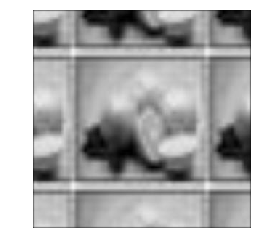

shoe shop, shoe-shop, shoe store (score = 0.07055)
toyshop (score = 0.04850)
prison, prison house (score = 0.03815)
orangutan, orang, orangutang, Pongo pygmaeus (score = 0.03346)
Sussex spaniel (score = 0.02647)

test_images/32*32cifar/orange_padding/80.jpg


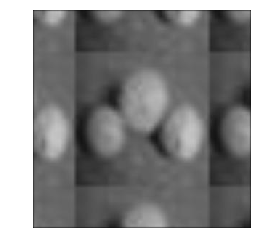

ping-pong ball (score = 0.75380)
golf ball (score = 0.01430)
tobacco shop, tobacconist shop, tobacconist (score = 0.01382)
toyshop (score = 0.01057)
medicine chest, medicine cabinet (score = 0.00883)

test_images/32*32cifar/orange_padding/13.jpg


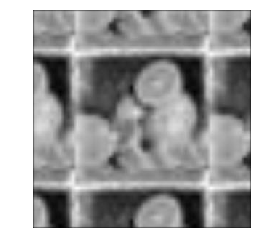

china cabinet, china closet (score = 0.18972)
beaker (score = 0.15573)
moving van (score = 0.07524)
fire screen, fireguard (score = 0.02302)
mobile home, manufactured home (score = 0.02036)

test_images/32*32cifar/orange_padding/59.jpg


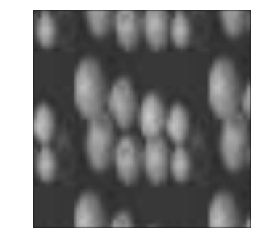

abacus (score = 0.75433)
scoreboard (score = 0.05293)
space bar (score = 0.03544)
horizontal bar, high bar (score = 0.01632)
typewriter keyboard (score = 0.00985)

test_images/32*32cifar/orange_padding/23.jpg


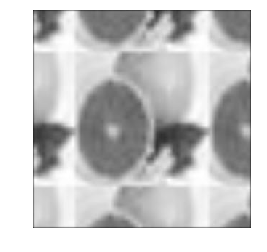

gong, tam-tam (score = 0.24960)
chime, bell, gong (score = 0.11118)
cassette player (score = 0.07403)
tape player (score = 0.02537)
cocktail shaker (score = 0.01682)

test_images/32*32cifar/orange_padding/8.jpg


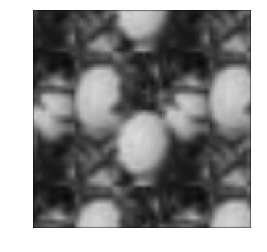

ping-pong ball (score = 0.94696)
toyshop (score = 0.00919)
parallel bars, bars (score = 0.00772)
guillotine (score = 0.00569)
horizontal bar, high bar (score = 0.00325)

test_images/32*32cifar/orange_padding/7.jpg


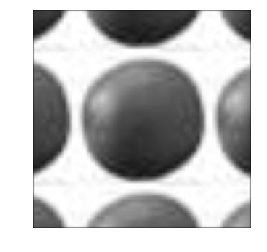

ping-pong ball (score = 0.32460)
croquet ball (score = 0.18973)
punching bag, punch bag, punching ball, punchball (score = 0.13278)
dumbbell (score = 0.05428)
face powder (score = 0.03852)

test_images/32*32cifar/orange_padding/43.jpg


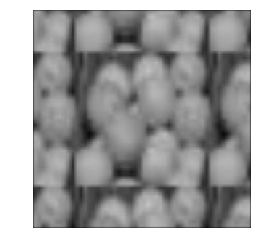

ping-pong ball (score = 0.89526)
rotisserie (score = 0.00504)
golf ball (score = 0.00466)
grocery store, grocery, food market, market (score = 0.00415)
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa (score = 0.00278)

test_images/32*32cifar/orange_padding/88.jpg


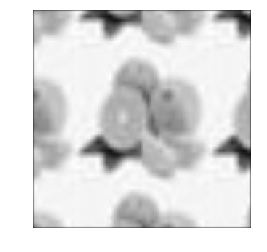

gong, tam-tam (score = 0.09742)
binder, ring-binder (score = 0.08186)
fire screen, fireguard (score = 0.06341)
screen, CRT screen (score = 0.04914)
dishwasher, dish washer, dishwashing machine (score = 0.03836)



In [3]:
conf=0#confidence
top_five=0#top-5
top_one=0
object_name = 'orange'
with tf.Session() as sess:  
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')  
    #遍历目录  
    for root, dirs, files in os.walk('test_images/32*32cifar/orange_padding/'):  
        for file in files:  
            #载入图片  
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()  
            predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式  
            predictions = np.squeeze(predictions)#把结果转为1维  
  
            #打印图片路径及名称  
            image_path = os.path.join(root,file)  
            print(image_path)  
            #显示图片  
            img = Image.open(image_path)  
            plt.imshow(img)  
            plt.axis('off')  
            plt.show()  
  
            #排序  
            top_k = predictions.argsort()[-5:][::-1]  
            node_lookup = NodeLookup() 
            if(node_lookup.id_to_string(top_k[0])==object_name):
                top_one+=1
                
             
            for node_id in top_k:  
                #获取分类名称  
                human_string = node_lookup.id_to_string(node_id)  
                #获取该分类的置信度  
                score = predictions[node_id]  
                
                if human_string==object_name:
                    conf+=score
                    top_five+=1#top 5
                print('%s (score = %.5f)' % (human_string, score))  
            print()

In [4]:
count=100.0

In [5]:
print('confidence=',conf/count)

confidence= 0.0


In [6]:
print('top-5=',top_five/count)

top-5= 0.0


In [7]:
print('top-1=',top_one/count)

top-1= 0.0
